46623


Text(0.5, 1.0, 'Q-Learning Training Performance')

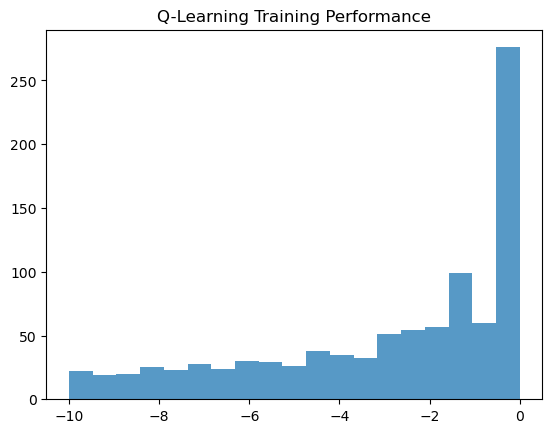

In [19]:
import numpy as np
import random

class QLearningAgent:
    def __init__(self, lr=0.1, gamma=0.97, epsilon=0.3):
        self.q_table = {}
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = [(v,a) for v in np.linspace(5, 30, 50) for a in np.linspace(0, np.pi/2.5, 10)]

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.actions)
        else:
            return max(self.actions, key=lambda a: self.get_q_value(state, a))

    def update_policy(self, state, action, reward, next_state):
        best_next_q = max([self.get_q_value(next_state, a) for a in self.actions], default=0.0)
        current_q = self.get_q_value(state, action)
        self.q_table[(state, action)] = reward#current_q + self.lr * (reward + self.gamma * best_next_q - current_q)

def simulate_shot(x, v, alpha):
    z = 1.8  # Initial height
    dt = 0.01
    vh = v * np.cos(alpha)
    vv = v * np.sin(alpha)
    while x < 30:
        x += vh * dt
        z += vv * dt
        vv -= 9.8 * dt
    return -0.5 * np.abs(z - 3.05)
history_state_reward = []
history_action = []
def train(agent, episodes=5000):
    reward_list = []
    for _ in range(episodes):
        x_pos = np.random.randn()*5+15
        state = x_pos
        discrete_state=int((state-15)*10)
        action = agent.select_action(discrete_state)
        reward = simulate_shot(state, action[0], action[1])
        agent.update_policy(discrete_state, action, reward, state)
        reward_list.append(reward)
        history_state_reward.append((discrete_state, reward))
        history_action.append(action)
    return reward_list

def test(agent, episodes=1000):
    reward_list_test = []
    agent.epsilon = 0  # Set epsilon to 0 for testing
    for _ in range(episodes):
        x_pos = np.random.randn()*5+15
        state = x_pos
        discrete_state=int((state-15))
        action = agent.select_action(discrete_state)
        reward = simulate_shot(state, action[0], action[1])
        agent.update_policy(discrete_state, action, reward, discrete_state)
        reward_list_test.append(reward)
        
    return reward_list_test

if __name__ == "__main__":
    agent = QLearningAgent()
    reward_L = train(agent,episodes=50000)
    reward_L_test = test(agent)
print(len(agent.q_table))
#print(history)
import matplotlib.pyplot as plt
h1=plt.hist(reward_L_test,bins=np.linspace(-10, 0, 20), alpha=0.75)

#plt.xlabel("Episode")
#plt.ylabel("Reward")
plt.title("Q-Learning Training Performance")


In [17]:
x=15+np.random.randn(1000)*5
print(x.min(),x.max())

0.22954977134940435 30.96989649706665


(array([ 1.,  2.,  0.,  2.,  1.,  0.,  1.,  2.,  1.,  1.,  2.,  3.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         3.,  3.,  2.,  2.,  3.,  4.,  2.,  1.,  0.,  3.,  6.,  4.,  5.,
         4.,  9.,  5., 17., 17., 44., 89., 49.,  2., 10., 16.]),
 array([-236.76578188, -232.04037452, -227.31496716, -222.58955981,
        -217.86415245, -213.13874509, -208.41333773, -203.68793037,
        -198.96252301, -194.23711566, -189.5117083 , -184.78630094,
        -180.06089358, -175.33548622, -170.61007887, -165.88467151,
        -161.15926415, -156.43385679, -151.70844943, -146.98304208,
        -142.25763472, -137.53222736, -132.80682   , -128.08141264,
        -123.35600529, -118.63059793, -113.90519057, -109.17978321,
        -104.45437585,  -99.72896849,  -95.00356114,  -90.27815378,
         -85.55274642,  -80.82733906,  -76.1019317 ,  -71.37652435,
         -66.65111699,  -61.92570963,  -57.20030227,  -52.47489491,
         -47.74948756,  -43.0240802 

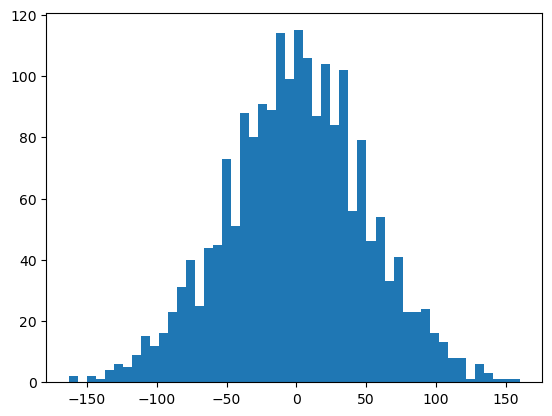

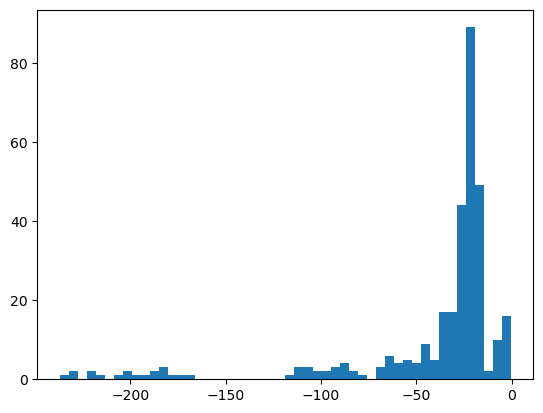

In [ ]:
nstates=10
play_database = [[] for _ in range(nstates)]
history_state_reward = np.array(history_state_reward)
history_action = np.array(history_action)
import matplotlib.pyplot as plt
h1=plt.hist(history_state_reward[:, 0], bins=50)
a=np.nonzero(np.abs(history_state_reward[:, 0])<10)
plt.figure()
plt.hist(history_state_reward[a[0], 1], bins=50)